In [8]:
%matplotlib inline
from obspy import read_inventory
import pandas as pd
import numpy as np

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.io.img_tiles as cimgt


In [9]:
# inventory = read_inventory('/media/sda/data/borehole/7F.OmanDP.PIC.2020127', format="STATIONXML")
# inventory = read_inventory('stationData.xml', format="STATIONXML")
inventory = read_inventory('fdsn-station_2021-06-29T11_00_50.xml', format="STATIONXML")

In [10]:
# pd.DataFrame([(id, inventory.get_coordinates(seed_id=id)) for id in inventory.networks[0].get_contents()['channels']])
channels = inventory.networks[0].get_contents()['channels']
networkdf = pd.DataFrame([inventory.get_coordinates(seed_id=id) for id in channels], index=[id for id in channels])

In [11]:
networkdf

,latitude,longitude,elevation,local_depth
7F.A00.01.GDH,22.881217,58.700583,534.0,35.0
7F.A00.02.GDH,22.881217,58.700583,534.0,105.0
7F.A00.03.GDH,22.881217,58.700583,534.0,175.0
7F.A00.04.GDH,22.881217,58.700583,534.0,245.0
7F.A00.05.GDH,22.881217,58.700583,534.0,315.0
...,...,...,...,...
7F.B19..GH2,22.882033,58.699387,536.9,0.0
7F.B19..GHZ,22.882033,58.699387,536.9,0.0
7F.B20..GH1,22.882580,58.700788,537.2,0.0
7F.B20..GH2,22.882580,58.700788,537.2,0.0


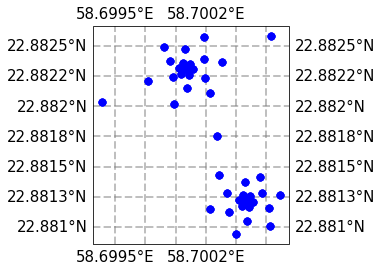

In [18]:
# fig, ax = plt.subplots(1)

proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.coastlines(resolution='110m')                # the level of resolution to render the drawings, 
                                                # see documentation for more details
    
gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True              # label coordinates
                , linewidth=2                   # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.5
                , linestyle='--')

       
gl.xlabel_style = {'size': 15}                                     # change label font sizes
gl.ylabel_style = {'size': 15}

ax.plot(networkdf.longitude, networkdf.latitude                                             # mark a known place to help us geo-locate ourselves
        , 'bo'
        , markersize=7
        , transform=ccrs.Geodetic())

# resolution = 1

# stamen_terrain = cimgt.StamenTerrain()                       # create a stamen terrain instance
# ax.add_image(stamen_terrain, resolution)                     # plot the image
